In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
online = pd.read_csv('Online Retail.csv', sep=';',index_col=False, dtype='unicode')

In [3]:
online.head()

InvoiceNo StockCode                          Description Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6   
1    536365     71053                  WHITE METAL LANTERN        6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6   

      InvoiceDate UnitPrice TotalSum        CustomerID        Country,,,  
0  1/12/2010 8:26      2,55     1.60             17850  United Kingdom,,  
1  1/12/2010 8:26      3,39     1.24             17850  United Kingdom,,  
2  1/12/2010 8:26      2,75    17850  United Kingdom,,               NaN  
3  1/12/2010 8:26      3,39     2.10             17850  United Kingdom,,  
4  1/12/2010 8:26      3,39    17850  United Kingdom,,               NaN

In [4]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    541909 non-null  object
 1   StockCode    541210 non-null  object
 2   Description  540453 non-null  object
 3   Quantity     540670 non-null  object
 4   InvoiceDate  540670 non-null  object
 5   UnitPrice    540670 non-null  object
 6   TotalSum     406289 non-null  object
 7   CustomerID   540670 non-null  object
 8   Country,,,   8 non-null       object
dtypes: object(9)
memory usage: 37.2+ MB


In [5]:
# convert object to datetime
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

In [6]:
# convert object to float
online['UnitPrice'] = online['UnitPrice'].astype(str).apply(lambda x: x.replace(',', '.'))

In [7]:
online['UnitPrice'] = online['UnitPrice'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [8]:
online.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity               object
InvoiceDate    datetime64[ns]
UnitPrice             float64
TotalSum               object
CustomerID             object
Country,,,             object
dtype: object

In [9]:
online.head()

InvoiceNo StockCode                          Description Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6   
1    536365     71053                  WHITE METAL LANTERN        6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6   

          InvoiceDate  UnitPrice TotalSum        CustomerID        Country,,,  
0 2010-01-12 08:26:00       2.55     1.60             17850  United Kingdom,,  
1 2010-01-12 08:26:00       3.39     1.24             17850  United Kingdom,,  
2 2010-01-12 08:26:00       2.75    17850  United Kingdom,,               NaN  
3 2010-01-12 08:26:00       3.39     2.10             17850  United Kingdom,,  
4 2010-01-12 08:26:00       3.39    17850  United Kingdom,,               NaN

In [10]:
# Define a function that will parse the date
def get_day(x): 
    if pd.notnull(x): 
        return dt.datetime(x.year, x.month, x.day) 
    else:
        return pd.NaT

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

# View the top 5 rows
#print()
online.head()

InvoiceNo StockCode                          Description Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6   
1    536365     71053                  WHITE METAL LANTERN        6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6   

          InvoiceDate  UnitPrice TotalSum        CustomerID        Country,,,  \
0 2010-01-12 08:26:00       2.55     1.60             17850  United Kingdom,,   
1 2010-01-12 08:26:00       3.39     1.24             17850  United Kingdom,,   
2 2010-01-12 08:26:00       2.75    17850  United Kingdom,,               NaN   
3 2010-01-12 08:26:00       3.39     2.10             17850  United Kingdom,,   
4 2010-01-12 08:26:00       3.39    17850  United Kingdom,,               NaN   

  InvoiceDay  CohortDay  
0 2010-01-12 2010-01-12  
1 2010-01-12 2010-01-12  
2 2010-01-12 2010-01-12  
3 2010-01-12 2010-01-12  
4 2010-01-12 2010-01-12

In [11]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [12]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

In [13]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
online.head()

InvoiceNo StockCode                          Description Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6   
1    536365     71053                  WHITE METAL LANTERN        6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6   

          InvoiceDate  UnitPrice TotalSum        CustomerID        Country,,,  \
0 2010-01-12 08:26:00       2.55     1.60             17850  United Kingdom,,   
1 2010-01-12 08:26:00       3.39     1.24             17850  United Kingdom,,   
2 2010-01-12 08:26:00       2.75    17850  United Kingdom,,               NaN   
3 2010-01-12 08:26:00       3.39     2.10             17850  United Kingdom,,   
4 2010-01-12 08:26:00       3.39    17850  United Kingdom,,               NaN   

  InvoiceDay  CohortDay  CohortIndex  
0 2010-01-12 2010-01-12          1.0  
1 2010-01-12 2010-01-12          1.0  
2 2010-01-12 2010-01-12          1.0  
3 2010-01-12 2010-01-12          1.0  
4 2010-01-12 2010-01-12          1.0

In [14]:
def get_month(x): 
    if pd.notnull(x): 
        return dt.datetime(x.year, x.month, 1) 
    else:
        return pd.NaT

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

grouping = online.groupby('CustomerID')['InvoiceMonth']

online['CohortMonth'] = grouping.transform('min')

In [15]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [16]:
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

years_diff = invoice_year - cohort_year

months_diff = invoice_month - cohort_month

online['CohortIndex'] = years_diff * 12 + months_diff + 1

In [17]:
online.head()

InvoiceNo StockCode                          Description Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6   
1    536365     71053                  WHITE METAL LANTERN        6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6   

          InvoiceDate  UnitPrice TotalSum        CustomerID        Country,,,  \
0 2010-01-12 08:26:00       2.55     1.60             17850  United Kingdom,,   
1 2010-01-12 08:26:00       3.39     1.24             17850  United Kingdom,,   
2 2010-01-12 08:26:00       2.75    17850  United Kingdom,,               NaN   
3 2010-01-12 08:26:00       3.39     2.10             17850  United Kingdom,,   
4 2010-01-12 08:26:00       3.39    17850  United Kingdom,,               NaN   

  InvoiceDay  CohortDay  CohortIndex InvoiceMonth CohortMonth  
0 2010-01-12 2010-01-12          1.0   2010-01-01  2010-01-01  
1 2010-01-12 2010-01-12          1.0   2010-01-01  2010-01-01  
2 2010-01-12 2010-01-12          1.0   2010-01-01  2010-01-01  
3 2010-01-12 2010-01-12          1.0   2010-01-01  2010-01-01  
4 2010-01-12 2010-01-12          1.0   2010-01-01  2010-01-01

In [18]:
# Count monthly active customers from each cohort
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

cohort_counts

CohortIndex  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  ...  \
CohortMonth                                                              ...   
2010-01-01   18.0   7.0   9.0   NaN   9.0   9.0   8.0  11.0   9.0   9.0  ...   
2010-03-01   11.0   NaN   NaN   3.0   NaN   2.0   3.0   2.0   NaN   9.0  ...   
2010-05-01    3.0   NaN   NaN   1.0   1.0   NaN   NaN   1.0   NaN   1.0  ...   
2010-07-01    2.0   NaN   NaN   NaN   NaN   1.0   2.0   2.0   1.0   1.0  ...   
2010-09-01    4.0   NaN   NaN   NaN   1.0   3.0   1.0   2.0   4.0   3.0  ...   
2010-10-01    2.0   NaN   NaN   1.0   NaN   1.0   1.0   NaN   NaN   1.0  ...   
2010-12-01   16.0   9.0  11.0   9.0  10.0   9.0   8.0  10.0   8.0  10.0  ...   
2011-01-01   20.0   5.0   6.0   6.0   7.0   8.0   5.0   9.0   5.0   6.0  ...   
2011-02-01    9.0   3.0   1.0   3.0   1.0   3.0   3.0   1.0   3.0   2.0  ...   
2011-03-01    3.0   1.0   NaN   2.0   1.0   2.0   NaN   1.0   2.0   NaN  ...   
2011-04-01    6.0   1.0   2.0   3.0   NaN   NaN   2.0   2.0   NaN   NaN  ...   
2011-05-01    3.0   1.0   1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2011-06-01    5.0   1.0   3.0   NaN   NaN   2.0   NaN   NaN   NaN   NaN  ...   
2011-07-01    3.0   NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN   NaN  ...   
2011-08-01    7.0   2.0   2.0   2.0   1.0   NaN   NaN   NaN   NaN   NaN  ...   
2011-09-01    1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2011-10-01    2.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2011-11-01    1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

CohortIndex  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  
CohortMonth                                                              
2010-01-01   14.0  14.0  14.0  15.0  15.0  15.0  15.0  14.0  15.0  13.0  
2010-03-01   11.0  10.0  10.0  10.0   9.0  10.0  11.0   5.0   NaN   NaN  
2010-05-01    1.0   1.0   1.0   1.0   1.0   NaN   NaN   NaN   NaN   NaN  
2010-07-01    2.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
2010-09-01    4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-10-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-12-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-01-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-02-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-03-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-04-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-05-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-06-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-07-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-08-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-09-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-10-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-11-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[18 rows x 24 columns]

In [19]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [20]:
retention

CohortIndex  1.0       2.0       3.0       4.0       5.0       6.0       7.0   \
CohortMonth                                                                     
2010-01-01    1.0  0.388889  0.500000       NaN  0.500000  0.500000  0.444444   
2010-03-01    1.0       NaN       NaN  0.272727       NaN  0.181818  0.272727   
2010-05-01    1.0       NaN       NaN  0.333333  0.333333       NaN       NaN   
2010-07-01    1.0       NaN       NaN       NaN       NaN  0.500000  1.000000   
2010-09-01    1.0       NaN       NaN       NaN  0.250000  0.750000  0.250000   
2010-10-01    1.0       NaN       NaN  0.500000       NaN  0.500000  0.500000   
2010-12-01    1.0  0.562500  0.687500  0.562500  0.625000  0.562500  0.500000   
2011-01-01    1.0  0.250000  0.300000  0.300000  0.350000  0.400000  0.250000   
2011-02-01    1.0  0.333333  0.111111  0.333333  0.111111  0.333333  0.333333   
2011-03-01    1.0  0.333333       NaN  0.666667  0.333333  0.666667       NaN   
2011-04-01    1.0  0.166667  0.333333  0.500000       NaN       NaN  0.333333   
2011-05-01    1.0  0.333333  0.333333  0.333333       NaN       NaN       NaN   
2011-06-01    1.0  0.200000  0.600000       NaN       NaN  0.400000       NaN   
2011-07-01    1.0       NaN       NaN       NaN  0.666667       NaN       NaN   
2011-08-01    1.0  0.285714  0.285714  0.285714  0.142857       NaN       NaN   
2011-09-01    1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2011-10-01    1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2011-11-01    1.0       NaN       NaN       NaN       NaN       NaN       NaN   

CohortIndex      8.0       9.0       10.0  ...      15.0      16.0      17.0  \
CohortMonth                                ...                                 
2010-01-01   0.611111  0.500000  0.500000  ...  0.777778  0.777778  0.777778   
2010-03-01   0.181818       NaN  0.818182  ...  1.000000  0.909091  0.909091   
2010-05-01   0.333333       NaN  0.333333  ...  0.333333  0.333333  0.333333   
2010-07-01   1.000000  0.500000  0.500000  ...  1.000000  0.500000       NaN   
2010-09-01   0.500000  1.000000  0.750000  ...  1.000000       NaN       NaN   
2010-10-01        NaN       NaN  0.500000  ...       NaN       NaN       NaN   
2010-12-01   0.625000  0.500000  0.625000  ...       NaN       NaN       NaN   
2011-01-01   0.450000  0.250000  0.300000  ...       NaN       NaN       NaN   
2011-02-01   0.111111  0.333333  0.222222  ...       NaN       NaN       NaN   
2011-03-01   0.333333  0.666667       NaN  ...       NaN       NaN       NaN   
2011-04-01   0.333333       NaN       NaN  ...       NaN       NaN       NaN   
2011-05-01        NaN       NaN       NaN  ...       NaN       NaN       NaN   
2011-06-01        NaN       NaN       NaN  ...       NaN       NaN       NaN   
2011-07-01        NaN       NaN       NaN  ...       NaN       NaN       NaN   
2011-08-01        NaN       NaN       NaN  ...       NaN       NaN       NaN   
2011-09-01        NaN       NaN       NaN  ...       NaN       NaN       NaN   
2011-10-01        NaN       NaN       NaN  ...       NaN       NaN       NaN   
2011-11-01        NaN       NaN       NaN  ...       NaN       NaN       NaN   

CohortIndex      18.0      19.0      20.0      21.0      22.0      23.0  \
CohortMonth                                                               
2010-01-01   0.833333  0.833333  0.833333  0.833333  0.777778  0.833333   
2010-03-01   0.909091  0.818182  0.909091  1.000000  0.454545       NaN   
2010-05-01   0.333333  0.333333       NaN       NaN       NaN       NaN   
2010-07-01   0.500000       NaN       NaN       NaN       NaN       NaN   
2010-09-01        NaN       NaN       NaN       NaN       NaN       NaN   
2010-10-01        NaN       NaN       NaN       NaN       NaN       NaN   
2010-12-01        NaN       NaN       NaN       NaN       NaN       NaN   
2011-01-01        NaN       NaN       NaN       NaN       NaN       NaN   
2011-02-01        NaN       

In [21]:
retention.round(3) * 100

CohortIndex   1.0   2.0   3.0   4.0   5.0   6.0    7.0    8.0    9.0   10.0  \
CohortMonth                                                                   
2010-01-01   100.0  38.9  50.0   NaN  50.0  50.0   44.4   61.1   50.0  50.0   
2010-03-01   100.0   NaN   NaN  27.3   NaN  18.2   27.3   18.2    NaN  81.8   
2010-05-01   100.0   NaN   NaN  33.3  33.3   NaN    NaN   33.3    NaN  33.3   
2010-07-01   100.0   NaN   NaN   NaN   NaN  50.0  100.0  100.0   50.0  50.0   
2010-09-01   100.0   NaN   NaN   NaN  25.0  75.0   25.0   50.0  100.0  75.0   
2010-10-01   100.0   NaN   NaN  50.0   NaN  50.0   50.0    NaN    NaN  50.0   
2010-12-01   100.0  56.2  68.8  56.2  62.5  56.2   50.0   62.5   50.0  62.5   
2011-01-01   100.0  25.0  30.0  30.0  35.0  40.0   25.0   45.0   25.0  30.0   
2011-02-01   100.0  33.3  11.1  33.3  11.1  33.3   33.3   11.1   33.3  22.2   
2011-03-01   100.0  33.3   NaN  66.7  33.3  66.7    NaN   33.3   66.7   NaN   
2011-04-01   100.0  16.7  33.3  50.0   NaN   NaN   33.3   33.3    NaN   NaN   
2011-05-01   100.0  33.3  33.3  33.3   NaN   NaN    NaN    NaN    NaN   NaN   
2011-06-01   100.0  20.0  60.0   NaN   NaN  40.0    NaN    NaN    NaN   NaN   
2011-07-01   100.0   NaN   NaN   NaN  66.7   NaN    NaN    NaN    NaN   NaN   
2011-08-01   100.0  28.6  28.6  28.6  14.3   NaN    NaN    NaN    NaN   NaN   
2011-09-01   100.0   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   
2011-10-01   100.0   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   
2011-11-01   100.0   NaN   NaN   NaN   NaN   NaN    NaN    NaN    NaN   NaN   

CohortIndex  ...   15.0  16.0  17.0  18.0  19.0  20.0   21.0  22.0  23.0  24.0  
CohortMonth  ...                                                                
2010-01-01   ...   77.8  77.8  77.8  83.3  83.3  83.3   83.3  77.8  83.3  72.2  
2010-03-01   ...  100.0  90.9  90.9  90.9  81.8  90.9  100.0  45.5   NaN   NaN  
2010-05-01   ...   33.3  33.3  33.3  33.3  33.3   NaN    NaN   NaN   NaN   NaN  
2010-07-01   ...  100.0  50.0   NaN  50.0   NaN   NaN    NaN   NaN   NaN   NaN  
2010-09-01   ...  100.0   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2010-10-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2010-12-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2011-01-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2011-02-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2011-03-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2011-04-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2011-05-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2011-06-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2011-07-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2011-08-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2011-09-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2011-10-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  
2011-11-01   ...    NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN  

[18 rows x 24 columns]

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 24))
plt.title('Retention rates')

sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = 0.0, vmax = 0.5, cmap = 'BuGn')
plt.show()

In [23]:
data_example = {'CustomerID': [0,1,2,3,4,5,6,7], 'Spend': [137,335,172,355,303,233,244,229]}

In [24]:
data = pd.DataFrame(data_example)

In [25]:
data

CustomerID  Spend
0           0    137
1           1    335
2           2    172
3           3    355
4           4    303
5           5    233
6           6    244
7           7    229

In [26]:
# Create a spend quartile with 4 groups and labels ranging from 1 through 4 
spend_quartile = pd.qcut(data['Spend'], q=4, labels=range(1,5))

# Assign the quartile values to the Spend_Quartile column in data
data['Spend_Quartile'] = spend_quartile

# Print data with sorted Spend values
print(data.sort_values('Spend'))

   CustomerID  Spend Spend_Quartile
0           0    137              1
2           2    172              1
7           7    229              2
5           5    233              2
6           6    244              3
4           4    303              3
1           1    335              4
3           3    355              4


In [27]:
data = pd.DataFrame({'CustomerID': [0,1,2,3,4,5,6,7], 'Recency_Days': [37,235,396,72,255,393,203,133]})

In [28]:
# Store labels from 4 to 1 in a decreasing order
r_labels = list(range(4, 0, -1))

# Create a spend quartile with 4 groups and pass the previously created labels 
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Assign the quartile values to the Recency_Quartile column in `data`
data['Recency_Quartile'] = recency_quartiles 

In [29]:
data.sort_values('Recency_Days')

CustomerID  Recency_Days Recency_Quartile
0           0            37                4
3           3            72                4
7           7           133                3
6           6           203                3
1           1           235                2
4           4           255                2
5           5           393                1
2           2           396                1

In [30]:
# Create string labels
r_labels = ['Active', 'Lapsed', 'Inactive', 'Churned']

# Divide into groups based on quartiles
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Create new column
data['Recency_Quartile'] = recency_quartiles

# Sort values from lowest to highest
data.sort_values('Recency_Days')

CustomerID  Recency_Days Recency_Quartile
0           0            37           Active
3           3            72           Active
7           7           133           Lapsed
6           6           203           Lapsed
1           1           235         Inactive
4           4           255         Inactive
5           5           393          Churned
2           2           396          Churned

In [31]:
online = pd.read_csv('Online Retail.csv', sep=';',index_col=False, dtype='unicode')

# convert object to datetime
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])
# convert object to float
# convert object to float
online['UnitPrice'] = online['UnitPrice'].astype(str).apply(lambda x: x.replace(',', '.'))
online['UnitPrice'] = online['UnitPrice'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
online.head()

InvoiceNo StockCode                          Description Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6   
1    536365     71053                  WHITE METAL LANTERN        6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6   

          InvoiceDate  UnitPrice TotalSum        CustomerID        Country,,,  
0 2010-01-12 08:26:00       2.55     1.60             17850  United Kingdom,,  
1 2010-01-12 08:26:00       3.39     1.24             17850  United Kingdom,,  
2 2010-01-12 08:26:00       2.75    17850  United Kingdom,,               NaN  
3 2010-01-12 08:26:00       3.39     2.10             17850  United Kingdom,,  
4 2010-01-12 08:26:00       3.39    17850  United Kingdom,,               NaN

In [32]:
print('Min:{}; Max:{}'.format(min(online.InvoiceDate),max(online.InvoiceDate)))

Min:2010-01-12 08:26:00; Max:2011-12-10 17:19:00


In [33]:
# Let's create a hypothetical snapshot_day data as if we're doing analysis recently
snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1)

In [34]:
snapshot_date=pd.to_datetime(snapshot_date)

In [35]:
# Aggregate data on a customer level

datamart = online.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'
})

# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency',
        'InvoiceNo': 'Frequency',
        'TotalSum': 'MonetaryValue'
                          }, inplace=True)
# Check the first rows
datamart.head()

Recency  Frequency         MonetaryValue
CustomerID                                          
13047           698          1                  6.40
15805           425          3          6.917.932.30
17850           698          4      1.601.242.103.25
Australia        40          4  12393124151241512431
Australia,      208          3       124151241512415

In [36]:
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1); f_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(datamart['Frequency'], q=3, labels=f_labels)

# Create new columns R and F 
datamart = datamart.assign(R=r_groups.values, F=f_groups.values)


datamart.head(3)

Recency  Frequency     MonetaryValue  R  F
CustomerID                                            
13047           698          1              6.40  1  1
15805           425          3      6.917.932.30  1  1
17850           698          4  1.601.242.103.25  1  1

In [37]:
# Convert 'MonetaryValue' column to numeric, ignoring errors
datamart['MonetaryValue'] = pd.to_numeric(datamart['MonetaryValue'], errors='coerce')

# Drop rows with missing values in the 'MonetaryValue' column
datamart_clean = datamart.dropna(subset=['MonetaryValue'])

# Create labels for MonetaryValue
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(datamart_clean['MonetaryValue'], q=3, labels=m_labels)

# Create new column M
datamart_clean = datamart_clean.assign(M=m_groups.values)

# Calculate RFM_Score
datamart_clean['RFM_Score'] = datamart_clean[['R', 'F', 'M']].sum(axis=1)

# Print the RFM scores for the first few rows
print(datamart_clean['RFM_Score'].head(1))


CustomerID
13047    3
Name: RFM_Score, dtype: int64


In [38]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Top'
    elif (df['RFM_Score'] >= 6) and (df['RFM_Score'] < 10):
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
datamart_clean['RFM_Level'] = datamart_clean.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
datamart_clean.head(1)

Recency  Frequency  MonetaryValue  R  F  M  RFM_Score RFM_Level
CustomerID                                                                 
13047           698          1            6.4  1  1  1          3       Low

In [39]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart_clean.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  
    # Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
rfm_level_agg

Recency Frequency  MonetaryValue      
             mean      mean           mean count
RFM_Level                                       
Low         157.5       2.4   2.878431e+27    43
Middle       64.3      29.8  4.443610e+287    34

In [40]:
# Select only numerical columns for centering, scaling, and normalization
numerical_columns = data.select_dtypes(include=['int', 'float']).columns

# Center the numerical data by subtracting average values from each entry
data_centered = data[numerical_columns] - data[numerical_columns].mean()

# Scale the numerical data by dividing each entry by standard deviation
data_scaled = data[numerical_columns] / data[numerical_columns].std()

# Normalize the numerical data by applying both centering and scaling
data_normalized = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()

# Combine the normalized numerical data with non-numerical columns
data_normalized = pd.concat([data_normalized, data.select_dtypes(exclude=['int', 'float'])], axis=1)

# Print summary statistics to make sure average is zero and standard deviation is one
print(data_normalized.describe().round(2))


       CustomerID  Recency_Days
count        8.00          8.00
mean         0.00          0.00
std          1.00          1.00
min         -1.43         -1.33
25%         -0.71         -0.73
50%          0.00          0.03
75%          0.71          0.55
max          1.43          1.35


In [41]:
from sklearn.preprocessing import StandardScaler
# Initialize a scaler
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
# Fit the scaler
scaler.fit(data[numerical_columns])

# Scale and center the data
data_normalized = scaler.transform(data[numerical_columns])

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=numerical_columns)

# Print summary statistics
print(data_normalized.describe().round(2))

       CustomerID  Recency_Days
count        8.00          8.00
mean         0.00          0.00
std          1.07          1.07
min         -1.53         -1.43
25%         -0.76         -0.78
50%          0.00          0.03
75%          0.76          0.59
max          1.53          1.44


In [42]:
from sklearn.preprocessing import StandardScaler
# Initialize a scaler
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
# Fit the scaler
scaler.fit(data[numerical_columns])

# Scale and center the data
data_normalized = scaler.transform(data[numerical_columns])
print('mean: ', data_normalized.mean(axis=0).round(2))
print('std: ', data_normalized.std(axis=0).round(2))


mean:  [0. 0.]
std:  [1. 1.]


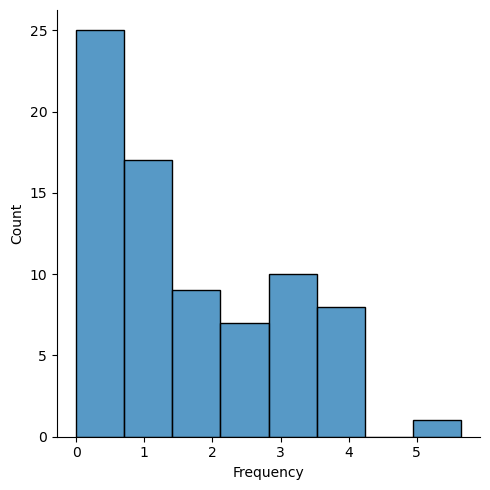

In [43]:
frequency_log=np.log(datamart_clean['Frequency'])
sns.displot(frequency_log)
plt.show()

In [44]:
sns.displot(datamart_clean['Recency'])
plt.show()

In [45]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace zero or negative values with a small positive value
data_cleaned = data[numerical_columns].replace({0: np.nan})
data_cleaned[data_cleaned <= 0] = np.nan

# Take the logarithm of the cleaned data
datamart_log = np.log(data_cleaned)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)


In [46]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Initialize the imputer to replace NaN values with the mean of each feature
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform it
datamart_imputed = imputer.fit_transform(datamart_normalized)

# Now, you can proceed with fitting the KMeans model
kmeans = KMeans(n_clusters=1, random_state=1)
kmeans.fit(datamart_imputed)
cluster_labels = kmeans.labels_

C:\Users\SreevaniPaipuru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SreevaniPaipuru\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
datamart_rfm_k2 = datamart.head(3).assign(Cluster = cluster_labels[:3])
datamart_rfm_k2

Recency  Frequency  MonetaryValue  R  F  Cluster
CustomerID                                                  
13047           698          1            6.4  1  1        0
15805           425          3            NaN  1  1        0
17850           698          4            NaN  1  1        0

In [48]:
datamart_rfm_k2
datamart_rfm_k2.groupby(['Cluster']).agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean','count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         607.0       3.0           6.0     1

In [49]:
# Import key libraries
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

In [50]:
# Fit KMeans and calculate SSE for each *k*
import warnings
warnings.filterwarnings("ignore")
sse = {}
for k in range(1, min(11, len(data_normalized) + 1)):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center


In [51]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [52]:
cluster_avg = datamart_rfm_k2.groupby(['Cluster']).mean()
population_avg = datamart.head(3).mean()
relative_imp = cluster_avg / population_avg-1
relative_imp.round(2)

Recency  Frequency  MonetaryValue
Cluster                                   
0            0.0        0.0            0.0

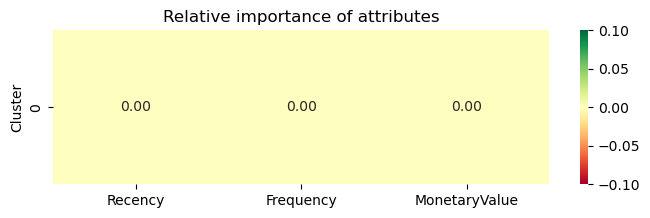

In [53]:
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()